# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season): [data](https://github.com/justmarkham/DAT4-students/blob/master/kerry/Final/NBA_players_2015.csv), [data dictionary](https://github.com/justmarkham/DAT-project-examples/blob/master/pdf/nba_paper.pdf)
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [1]:
# read the data into a DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT4-students/master/kerry/Final/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [2]:
# examine the columns
nba.columns

Index([u'season_end', u'player', u'pos', u'age', u'bref_team_id', u'g', u'gs',
       u'mp', u'fg', u'fga', u'fg_', u'x3p', u'x3pa', u'x3p_', u'x2p', u'x2pa',
       u'x2p_', u'ft', u'fta', u'ft_', u'orb', u'drb', u'trb', u'ast', u'stl',
       u'blk', u'tov', u'pf', u'pts', u'G', u'MP', u'PER', u'TS%', u'3PAr',
       u'FTr', u'TRB%', u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OWS',
       u'DWS', u'WS', u'WS/48', u'OBPM', u'DBPM', u'BPM', u'VORP'],
      dtype='object')

In [3]:
# This question is good for instructional purposes, it doesn't really makes sense to do
# examine the positions
nba.pos.value_counts()

G    200
F    199
C     79
dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [4]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [5]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf'] #assists, steal, block, turnover, personal fouls
X = nba[feature_cols]

In [6]:
# alternative way to create X
X = nba.loc[:, 'ast':'pf']

In [6]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [7]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# instantiate with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [32]:
# create a list to represent a player
player = [0, 1, 0, 1, 2]

In [26]:
# make a prediction
knn.predict(player)

array([1])

In [27]:
# calculate predicted probabilities
knn.predict_proba(player)

array([[ 0. ,  0.8,  0.2]])

## Step 5: Repeat steps 3 and 4 using K=50

In [33]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict(player)

array([1])

In [29]:
# calculate predicted probabilities
knn.predict_proba(player)

array([[ 0.22,  0.6 ,  0.18]])

## Bonus: Explore the features to decide which ones are predictive

In [34]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [35]:
# description of assists grouped by position
nba.groupby('pos').ast.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
pos,,,,,,,,
C,79,0.945570,0.858263,0,0.40,0.80,1.15,4.4
F,199,1.173367,1.086252,0,0.45,0.90,1.50,7.3
G,200,2.729000,2.128287,0,1.10,2.25,3.80,10.2


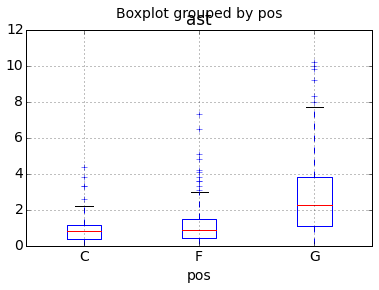

In [36]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001740B780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000184730F0>]], dtype=object)

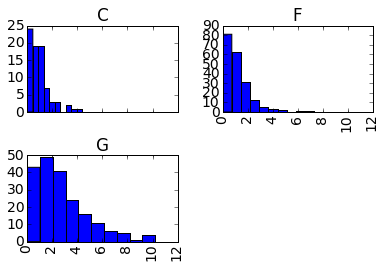

In [19]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True)

In [64]:
#nba.groupby('pos').mean()
nba.iloc[:, 0:20].head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,x3p,x3pa,x3p_,x2p,x2pa,x2p_,ft,fta,ft_
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,0.2,0.7,0.286,2.0,4.0,0.500,0.9,1.3,0.738
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,0.3,0.6,0.455,0.7,1.5,0.481,0.3,0.6,0.500
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,0.0,0.0,0.000,3.0,5.5,0.552,1.4,2.6,0.527
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,0.0,0.0,0.000,1.1,2.6,0.432,1.3,2.2,0.579
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,1.5,4.5,0.345,3.5,7.4,0.475,2.4,2.8,0.834


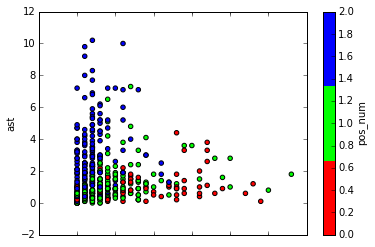

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

nba.plot(kind='scatter', x='blk', y='ast', c='pos_num', colormap=cmap_bold)

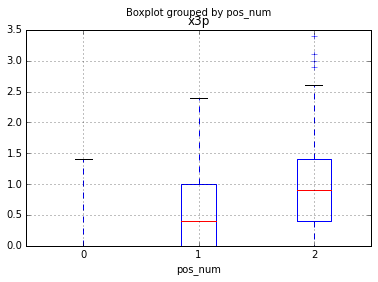

In [79]:
nba.boxplot(column='x3p', by='pos_num')
#Blocks and assists have okay differentiation